In [1]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
df = pd.read_csv("pm25-modis-3k.csv", index_col=0)
df.index = range(len(df))

In [3]:
regression_dictionary = {'KNN':KNeighborsRegressor(), 
                         'DT':DecisionTreeRegressor(),
                         'RF':RandomForestRegressor(),
                        'SVM':SVR(),
                        'Linear':LinearRegression()}

In [4]:
df.head()

,AOD,Location,Date,PM25
0,0.367,Punjabi Bagh,2017-01-02,174.054054
1,0.379,Mandir,2017-01-02,174.979167
2,0.696,Mandir,2017-01-05,155.812500
3,0.366,ITO,2017-01-06,152.968750
4,0.366,Punjabi Bagh,2017-01-06,139.500000


In [5]:
out = {}
for reg in regression_dictionary.keys():
    out[reg] = []
kf = KFold(n_splits=5)
#X = df[['AOD','Cloud_Fraction']]
X = df[['AOD']]
y = df.PM25

gt = []
for train_index, test_index in kf.split(df):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    gt.extend(y_test)
    
    for reg_algo_name, reg in regression_dictionary.items():
        reg.fit(X_train, y_train)
        out[reg_algo_name].extend(reg.predict(X_test))


/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [6]:
pd.DataFrame(out['DT'])

,0
0,112.064000
1,63.326608
2,165.466667
3,88.000000
4,88.000000
5,88.000000
6,171.697917
7,88.000000
8,111.760000
9,64.650000


In [7]:
import numpy as np
for reg in regression_dictionary.keys():
    out[reg] = np.array(out[reg]).flatten()

In [8]:
out['DT']

array([ 112.064     ,   63.32660751,  165.46666667,   88.        ,
         88.        ,   88.        ,  171.69791667,   88.        ,
        111.76      ,   64.65      ,   98.83333333,  111.76      ,
         64.65      ,   64.65      ,   69.42437276,   50.375     ,
         52.82857143,  132.32224719,  140.36616162,  140.36616162,
        140.36616162,   48.22580645,  118.45      ,   82.36363636,
        139.7025    ,  145.75      ,  118.36363636,   64.65      ,
         58.32075472,  171.69791667,   66.87464009,   96.39361702,
         69.42437276,  132.32224719,   48.0625    ,  139.7025    ,
         69.38983051,  108.25543478,   87.99093248,  134.83870968,
        134.83870968,  134.83870968,  134.83870968,   72.27272727,
         98.83333333,   98.83333333,  125.61793055,   82.18463234,
         55.41666667,   87.14661987,   93.2       ,  123.48809524,
        126.19430576,  123.48809524,  126.19430576,   75.11428571,
        158.43372093,  132.32224719,   86.25      ,  118.45   

In [9]:
pd.DataFrame(out)
out["GT"] = np.array(gt).flatten()

In [10]:
np.array(gt).flatten().shape

(872,)

In [11]:
out

{'DT': array([ 112.064     ,   63.32660751,  165.46666667,   88.        ,
          88.        ,   88.        ,  171.69791667,   88.        ,
         111.76      ,   64.65      ,   98.83333333,  111.76      ,
          64.65      ,   64.65      ,   69.42437276,   50.375     ,
          52.82857143,  132.32224719,  140.36616162,  140.36616162,
         140.36616162,   48.22580645,  118.45      ,   82.36363636,
         139.7025    ,  145.75      ,  118.36363636,   64.65      ,
          58.32075472,  171.69791667,   66.87464009,   96.39361702,
          69.42437276,  132.32224719,   48.0625    ,  139.7025    ,
          69.38983051,  108.25543478,   87.99093248,  134.83870968,
         134.83870968,  134.83870968,  134.83870968,   72.27272727,
          98.83333333,   98.83333333,  125.61793055,   82.18463234,
          55.41666667,   87.14661987,   93.2       ,  123.48809524,
         126.19430576,  123.48809524,  126.19430576,   75.11428571,
         158.43372093,  132.32224719,   86

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

In [27]:
mae = {}
r2 = {}
import scipy
for reg_algo_name in regression_dictionary.keys():
    mae[reg_algo_name] = mean_absolute_error(out['GT'],out[reg_algo_name])
    r2[reg_algo_name] = scipy.stats.spearmanr(out['GT'],out[reg_algo_name])
    

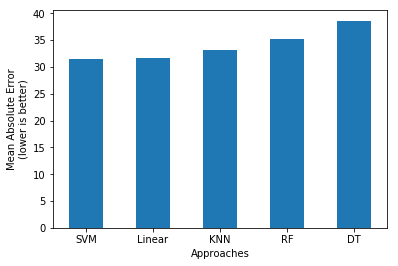

In [35]:
pd.Series(mae).sort_values().plot(kind='bar',rot=0)
import matplotlib.pyplot as plt
plt.xlabel("Approaches")
plt.ylabel("Mean Absolute Error\n(lower is better)")

In [29]:
pd.Series(r2)

DT           (0.056804467739, 0.0936670342618)
KNN         (-0.0262708098768, 0.438464555135)
Linear    (-0.378083094344, 5.12755943843e-31)
RF            (0.0517153420055, 0.12701824244)
SVM       (-0.376878952821, 8.15745723076e-31)
dtype: object

In [16]:
%matplotlib inline

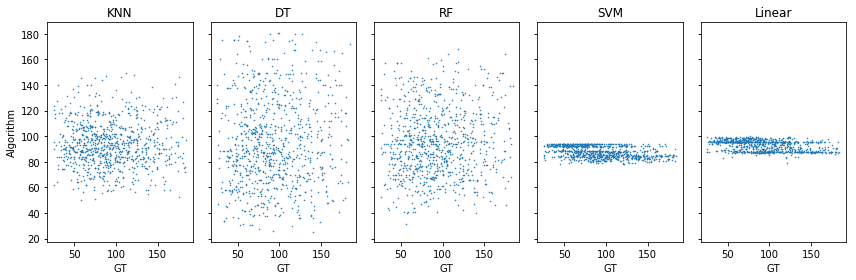

In [50]:
fig, ax= plt.subplots(ncols=len(regression_dictionary.keys()), sharey=True, figsize=(12, 4))
for i, reg in enumerate(regression_dictionary.keys()):
    pd.DataFrame(out).plot(kind='scatter',y=reg,x='GT', ax=ax[i], title=reg, s=0.3)
plt.tight_layout()
ax[0].set_ylabel("Algorithm")

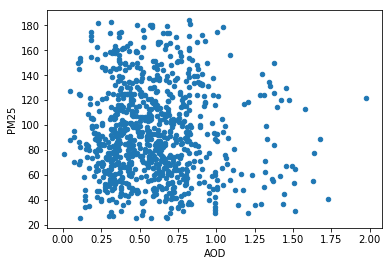

In [22]:
df.plot(kind='scatter',x='AOD',y='PM25')

In [23]:
df

,AOD,Location,Date,PM25
0,0.3670,Punjabi Bagh,2017-01-02,174.054054
1,0.3790,Mandir,2017-01-02,174.979167
2,0.6960,Mandir,2017-01-05,155.812500
3,0.3660,ITO,2017-01-06,152.968750
4,0.3660,Punjabi Bagh,2017-01-06,139.500000
5,0.3660,US Diplomatic Post: New Delhi,2017-01-06,145.833333
6,0.8210,R K Puram,2017-01-06,184.108108
7,0.3660,Mandir,2017-01-06,151.333333
8,0.8190,Sirifort,2017-01-06,159.984783
9,0.9050,US Diplomatic Post: New Delhi,2017-01-08,132.670833


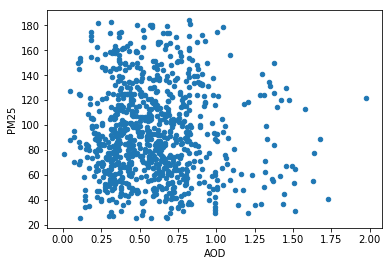

In [52]:
df.plot(kind='scatter',x='AOD',y='PM25')

In [56]:
df.corr()

,AOD,PM25
AOD,1.000000,-0.040065
PM25,-0.040065,1.000000


In [54]:
df

,AOD,Location,Date,PM25
0,0.3670,Punjabi Bagh,2017-01-02,174.054054
1,0.3790,Mandir,2017-01-02,174.979167
2,0.6960,Mandir,2017-01-05,155.812500
3,0.3660,ITO,2017-01-06,152.968750
4,0.3660,Punjabi Bagh,2017-01-06,139.500000
5,0.3660,US Diplomatic Post: New Delhi,2017-01-06,145.833333
6,0.8210,R K Puram,2017-01-06,184.108108
7,0.3660,Mandir,2017-01-06,151.333333
8,0.8190,Sirifort,2017-01-06,159.984783
9,0.9050,US Diplomatic Post: New Delhi,2017-01-08,132.670833
